In [76]:
#Degree Distribution
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [81]:
nodes = pd.read_csv('clean_nodes.csv', sep=';')
edges = pd.read_csv('clean_edges.csv', sep=';')
nodes
edges

,ID,source,target,weight
0,0,pride,month,829
1,1,pride,happy,797
2,2,pridemonth,pride,685
3,3,pride,gay,460
4,4,pride,love,455
...,...,...,...,...
23751,23751,flag,acceptance,2
23752,23752,adopt,pridemonth,2
23753,23753,scruff,scruffygay,2
23754,23754,annual,take,2


In [90]:
G = nx.from_pandas_edgelist(edges, source='source', target='target')
nx.is_connected(G)

False

In [125]:
# Generate connected components and select the largest:
largest_component = max(nx.connected_components(G), key=len)

# Create a subgraph of G consisting only of this component:
G2 = G.subgraph(largest_component)

nx.is_connected(G2)

clustering_coefficient = nx.average_clustering(G2)

print("Average Clustering Coefficient:", clustering_coefficient)

Average Clustering Coefficient: 0.5787206161378466


In [126]:
# Average centrality
dc=nx.degree_centrality(G2)
sum(dc.values()) / float(len(dc))

0.005720794860486075

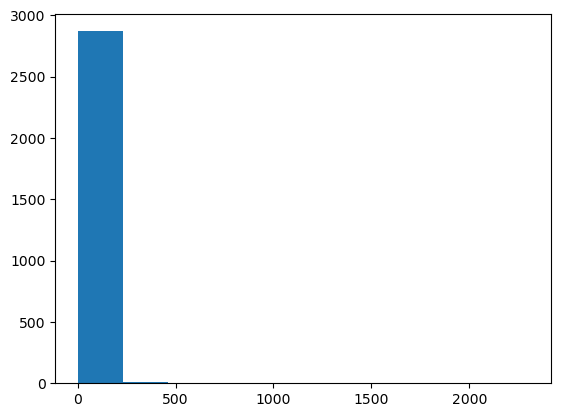

In [127]:
# degree distribution
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(G)

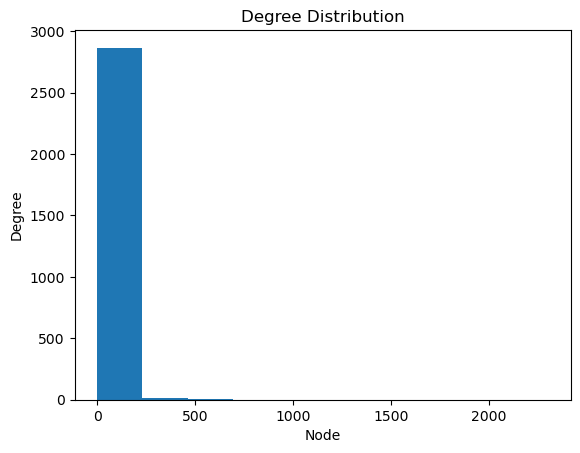

In [131]:
# Calculate the degree distribution
degree_sequence = [d for n, d in G2.degree()]

# Plot the degree distribution as a scatter plot
#plt.scatter(range(len(degree_sequence)), degree_sequence, alpha=0.7)
plt.xlabel("Node")
plt.ylabel("Degree")
plt.title("Degree Distribution")
plt.hist(degree_sequence)

plt.show()


Text(0, 0.5, 'Frequency')

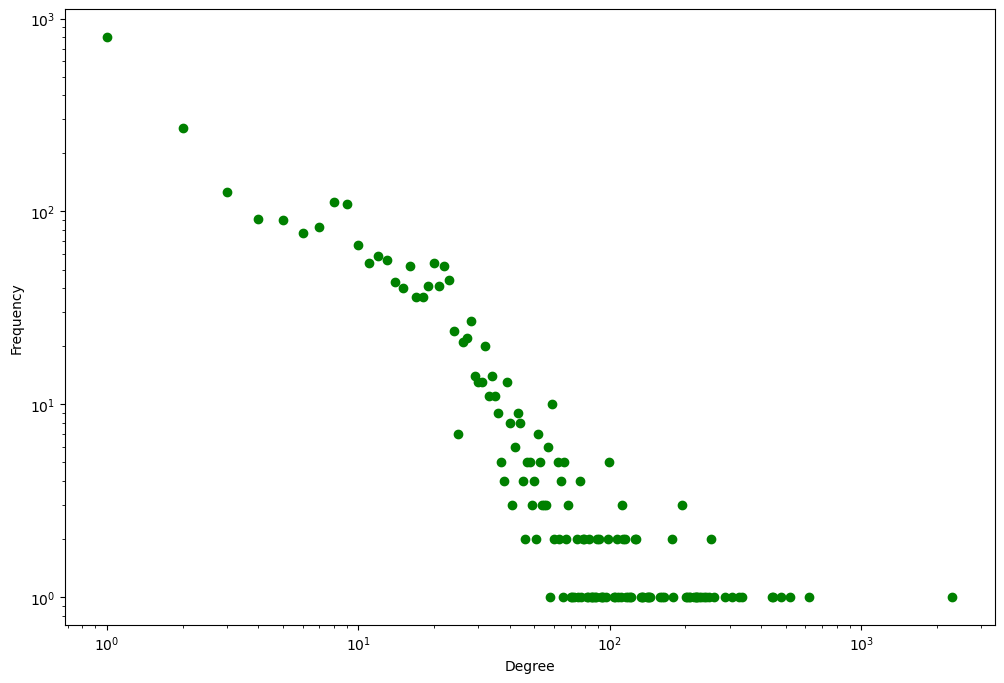

In [94]:
# degree distribution (loglog)
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [95]:
# global clustering coefficient
clust_coef = nx.average_clustering(G)
print(clust_coef)

0.5793045099477734


In [99]:
# assortativity measures
assort1 = nx.degree_assortativity_coefficient(G)
assort2 = nx.degree_pearson_correlation_coefficient(G2)
print('assort1', assort1)
print('assort2', assort2)

assort1 -0.12270468223115306
assort2 -0.12275107771287334


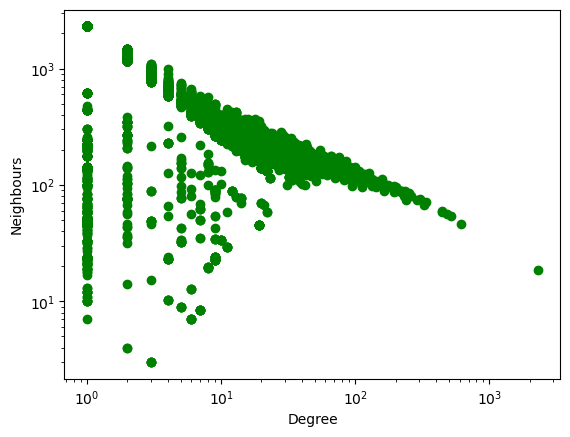

In [132]:
degrees = [val for (node, val) in G.degree()]
neighbours = list(nx.average_neighbor_degree(G).values())


plt.loglog(degrees, neighbours, 'go')
plt.xlabel('Degree')
plt.ylabel('Neighbours')
plt.show()